<center><h1> South German Credit </h1></center

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [4]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [5]:
data[['duration','amount','age']].describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [6]:
cols=['duration','amount','age']
data[[i for i in data.columns.values.tolist() if i not in cols]].mode().transpose()

,0
status,4
credit_history,2
purpose,3
savings,1
employment_duration,3
installment_rate,4
personal_status_sex,3
other_debtors,1
present_residence,4
property,3


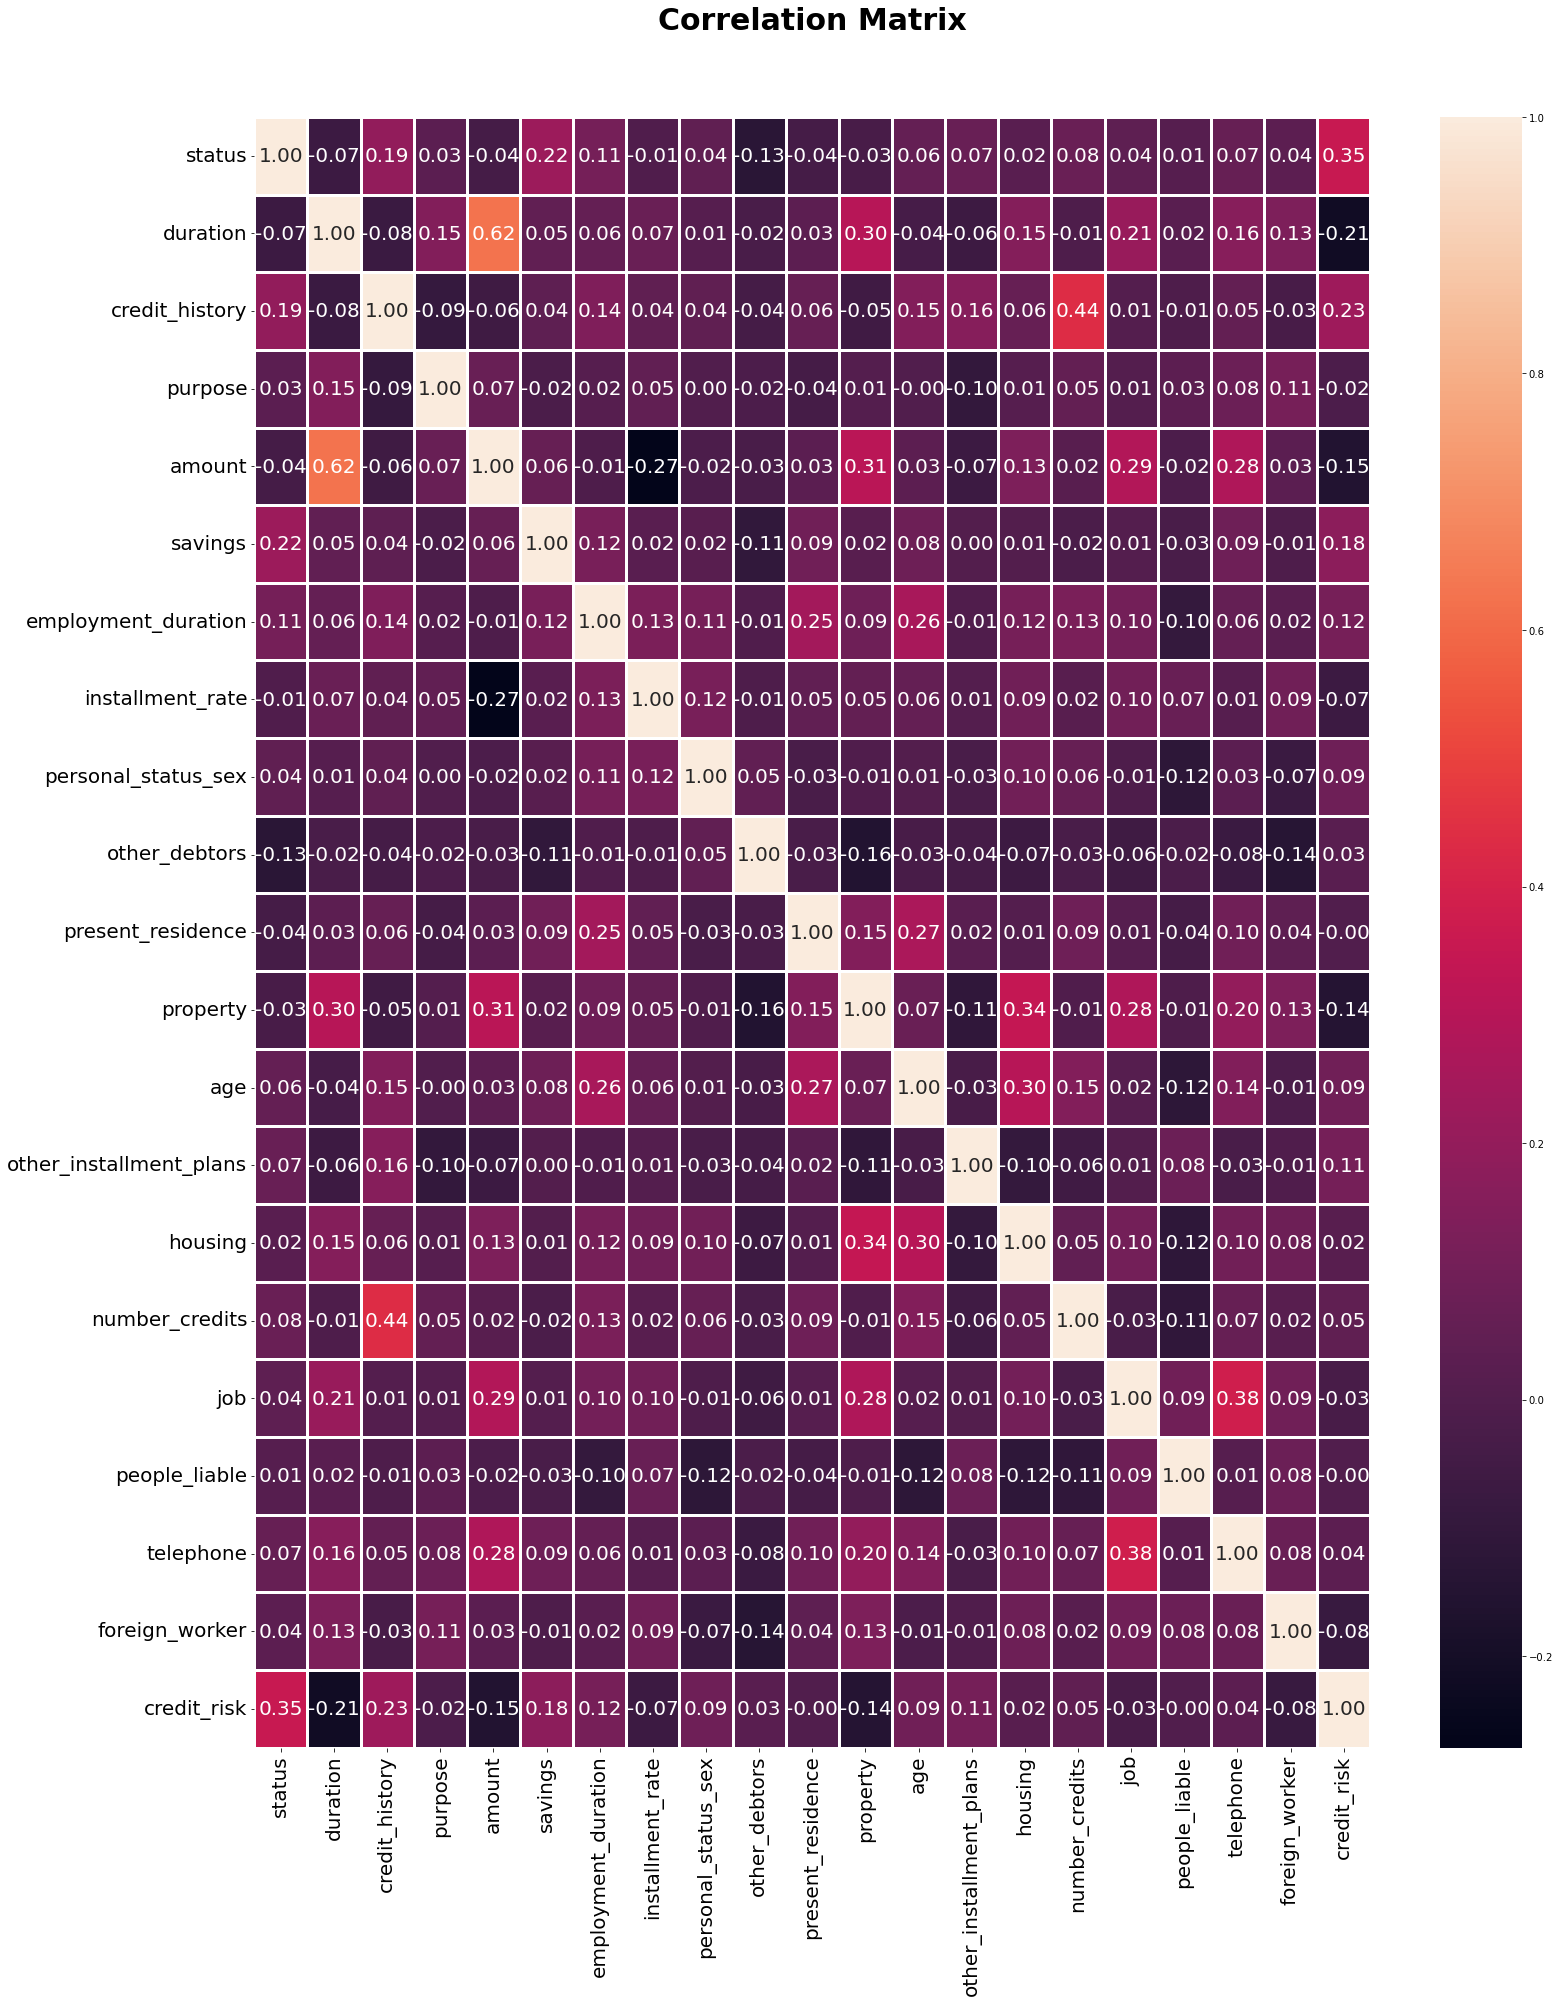

In [7]:
plt.rcParams["figure.figsize"]=(25,30)
sns.heatmap(data.corr(), annot=True, fmt=".2f", annot_kws={'size': 20}, linewidths = 3)
plt.title('Correlation Matrix', fontsize=30, y=1.05, weight='bold')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

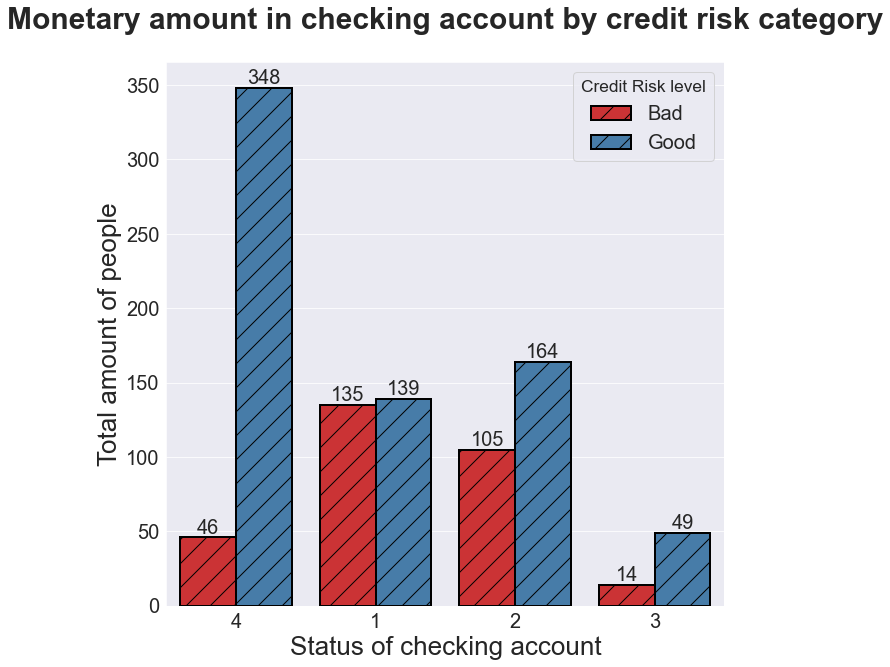

In [8]:
data['status'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['status'], hue=data['credit_risk'], order=data['status'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Monetary amount in checking account by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Status of checking account', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

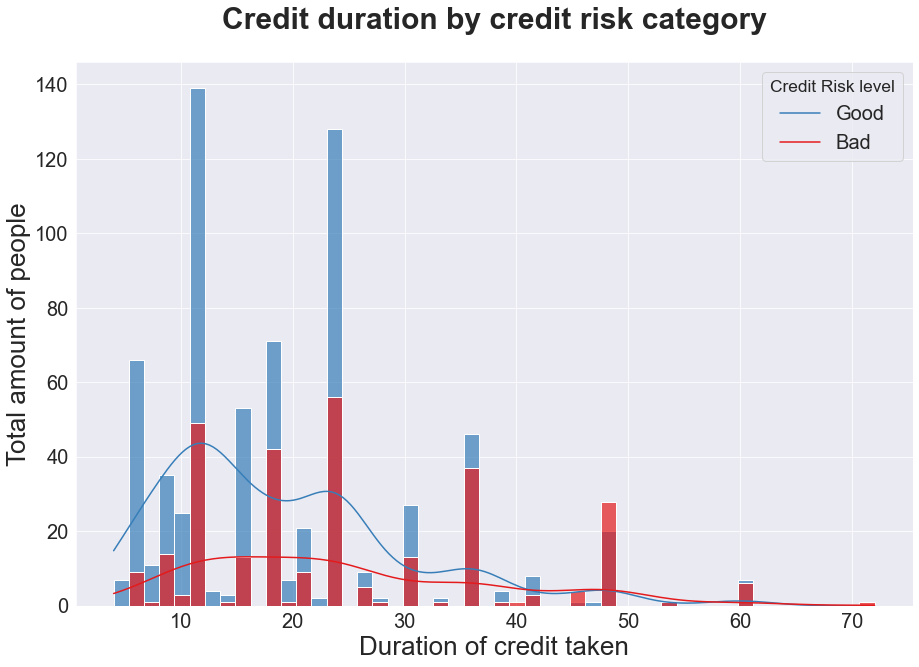

In [9]:
data['duration'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data['duration'], kde=True, alpha=0.7, hue=data['credit_risk'], palette='Set1', bins=50, fill=True)
plt.title('Credit duration by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good','Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

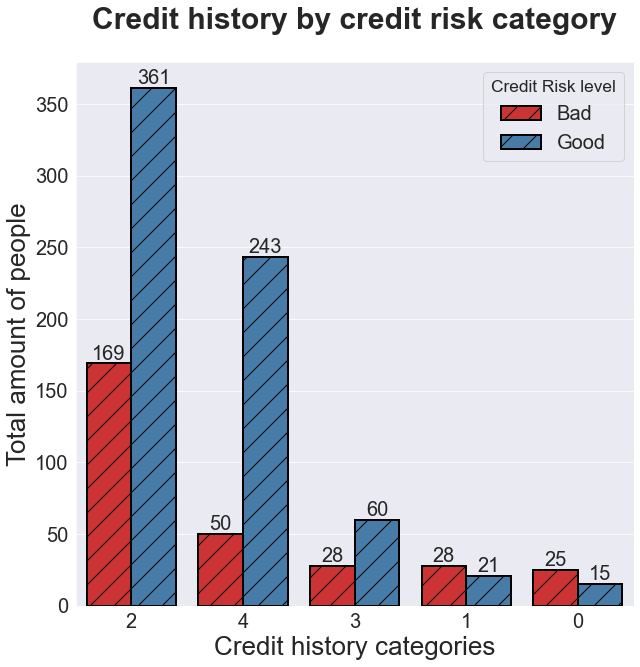

In [10]:
data['credit_history'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['credit_history'], hue=data['credit_risk'], order=data['credit_history'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit history by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Credit history categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

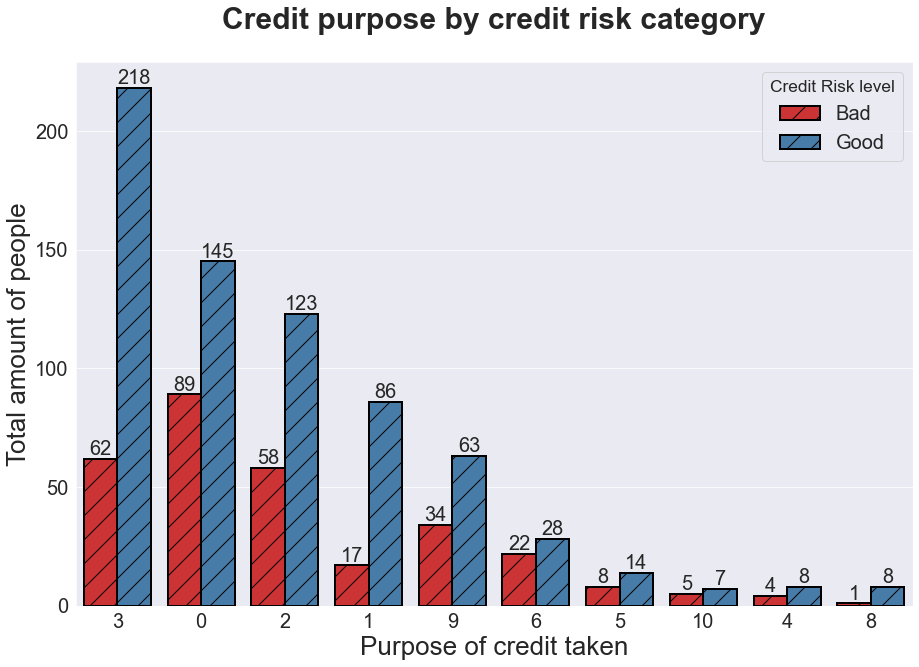

In [11]:
data['purpose'].unique()

plt.rcParams["figure.figsize"]=(15,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['purpose'], hue=data['credit_risk'], order=data['purpose'].value_counts().iloc[:11].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit purpose by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Purpose of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

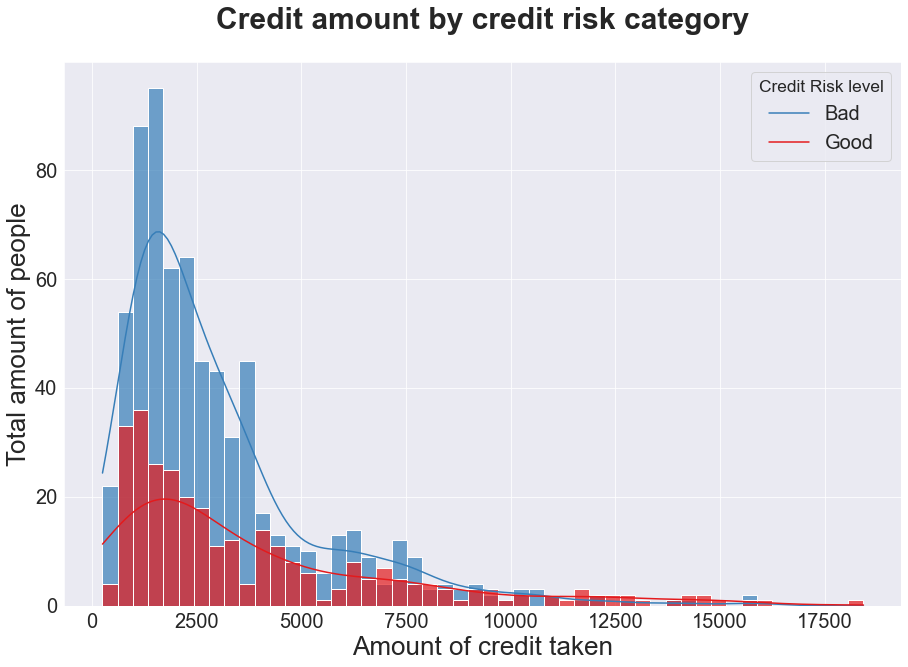

In [12]:
data['amount'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data['amount'], kde=True, alpha=0.7, hue=data['credit_risk'], palette='Set1', bins=50, fill=True)
plt.title('Credit amount by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Amount of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

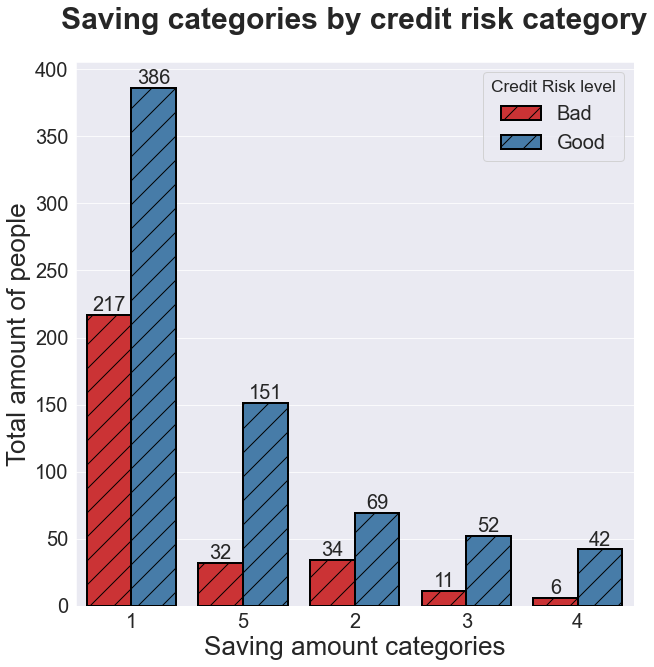

In [13]:
data['savings'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['savings'], hue=data['credit_risk'], order=data['savings'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Saving categories by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Saving amount categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

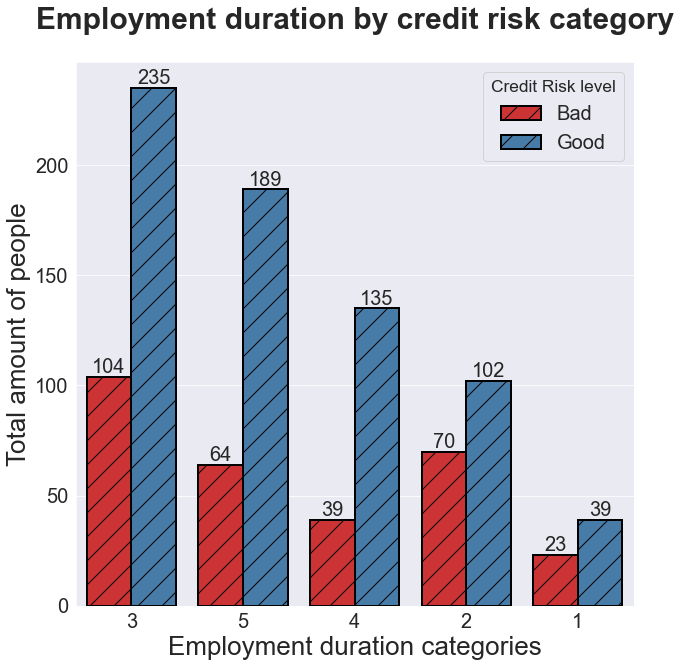

In [14]:
data['employment_duration'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['employment_duration'], hue=data['credit_risk'], order=data['employment_duration'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Employment duration by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Employment duration categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

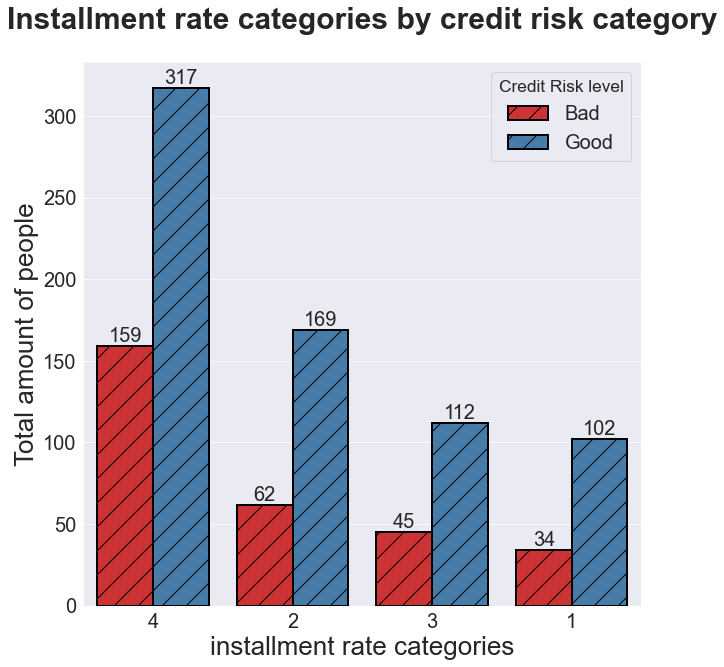

In [15]:
data['installment_rate'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['installment_rate'], hue=data['credit_risk'], order=data['installment_rate'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Installment rate categories by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('installment rate categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

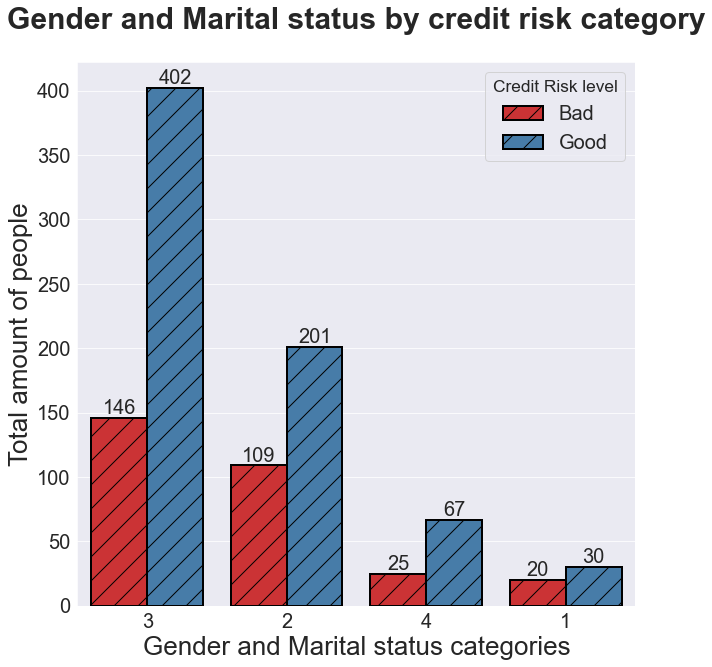

In [16]:
data['personal_status_sex'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['personal_status_sex'], hue=data['credit_risk'], order=data['personal_status_sex'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Gender and Marital status by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Gender and Marital status categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

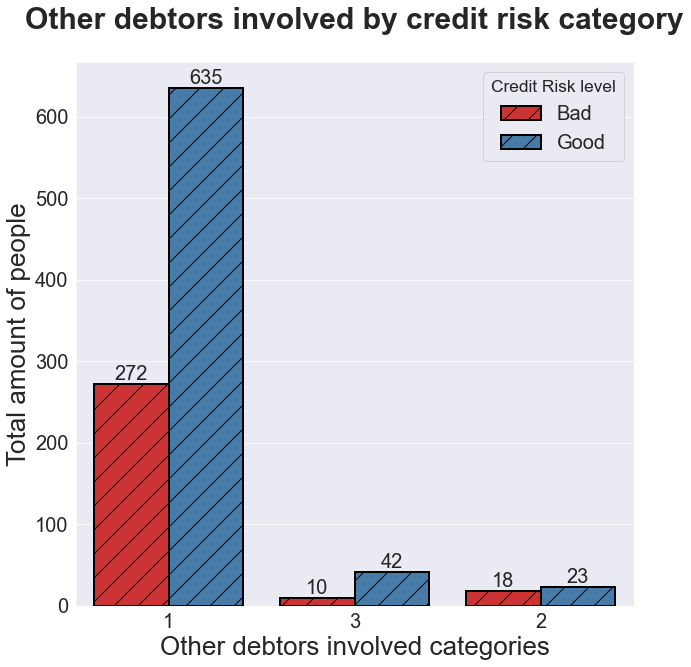

In [17]:
data['other_debtors'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['other_debtors'], hue=data['credit_risk'], order=data['other_debtors'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Other debtors involved by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Other debtors involved categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

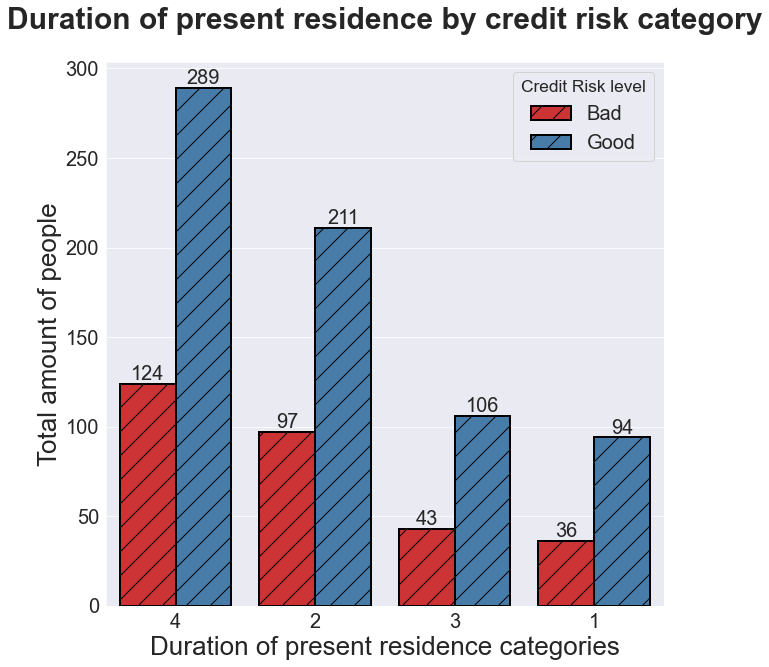

In [18]:
data['present_residence'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['present_residence'], hue=data['credit_risk'], order=data['present_residence'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Duration of present residence by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration of present residence categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

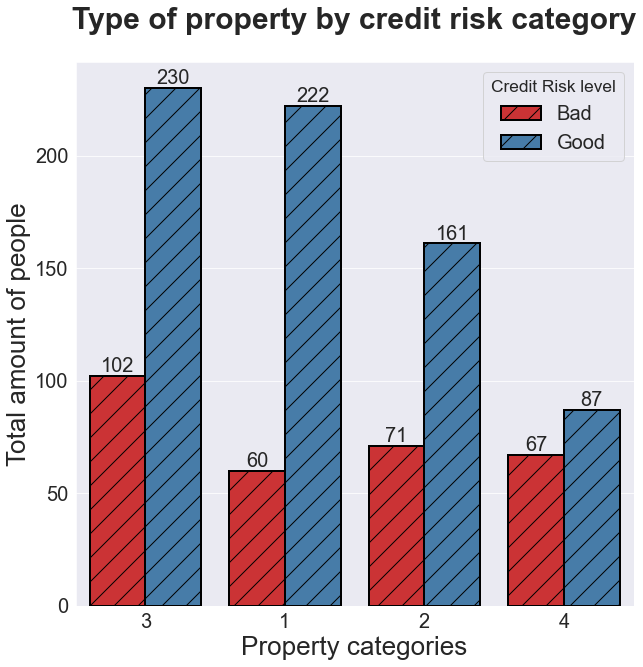

In [19]:
data['property'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['property'], hue=data['credit_risk'], order=data['property'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Type of property by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Property categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

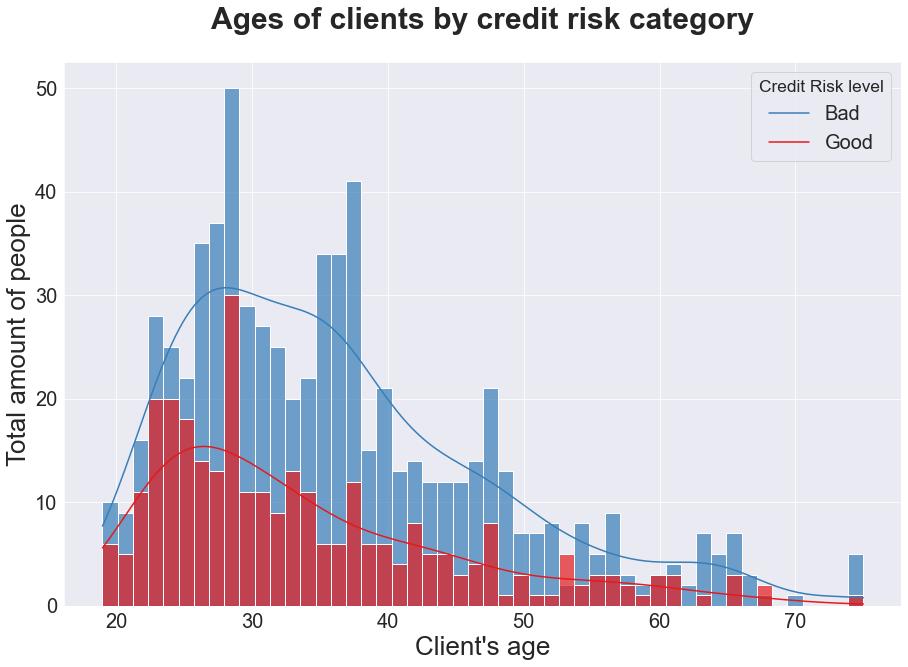

In [20]:
data['age'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data['age'], kde=True, alpha=0.7, hue=data['credit_risk'], palette='Set1', bins=50, fill=True)
plt.title('Ages of clients by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel("Client's age", fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

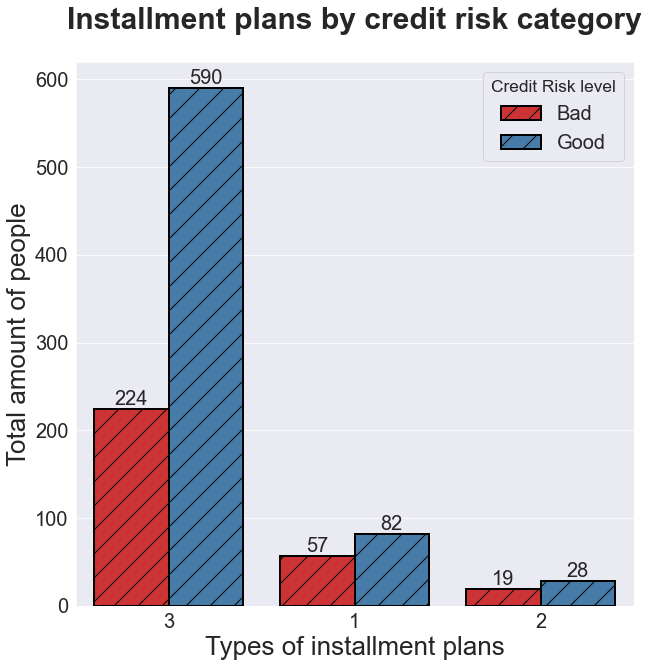

In [21]:
data['other_installment_plans'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['other_installment_plans'], hue=data['credit_risk'], order=data['other_installment_plans'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Installment plans by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Types of installment plans', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

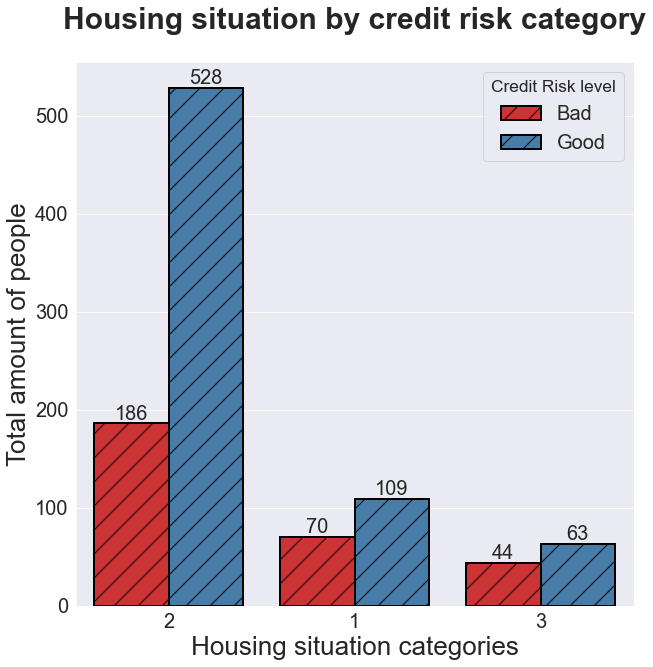

In [22]:
data['housing'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['housing'], hue=data['credit_risk'], order=data['housing'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Housing situation by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Housing situation categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

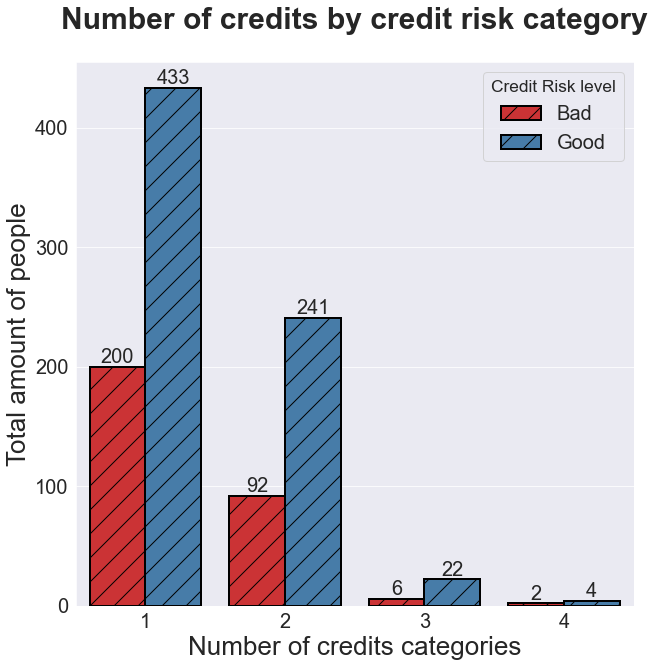

In [23]:
data['number_credits'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['number_credits'], hue=data['credit_risk'], order=data['number_credits'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Number of credits by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Number of credits categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

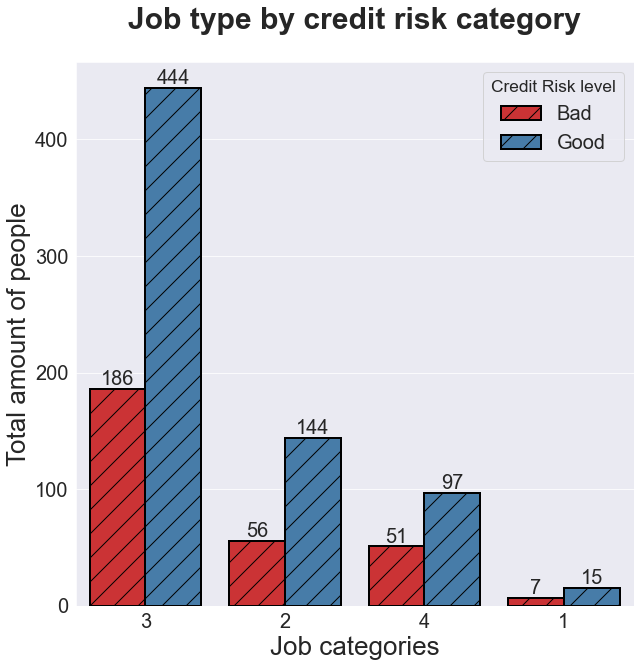

In [24]:
data['job'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['job'], hue=data['credit_risk'], order=data['job'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Job type by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Job categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

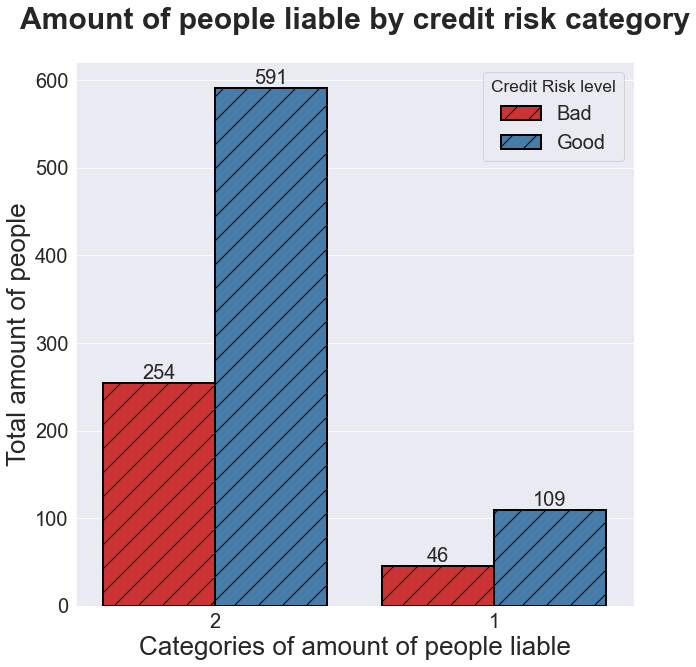

In [25]:
data['people_liable'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['people_liable'], hue=data['credit_risk'], order=data['people_liable'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Amount of people liable by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Categories of amount of people liable', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

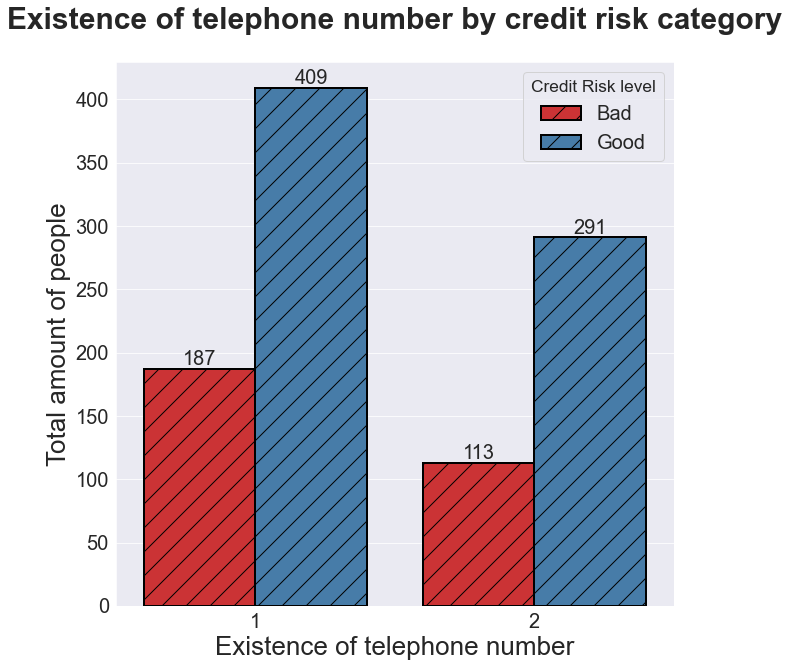

In [26]:
data['telephone'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['telephone'], hue=data['credit_risk'], order=data['telephone'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Existence of telephone number by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Existence of telephone number', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

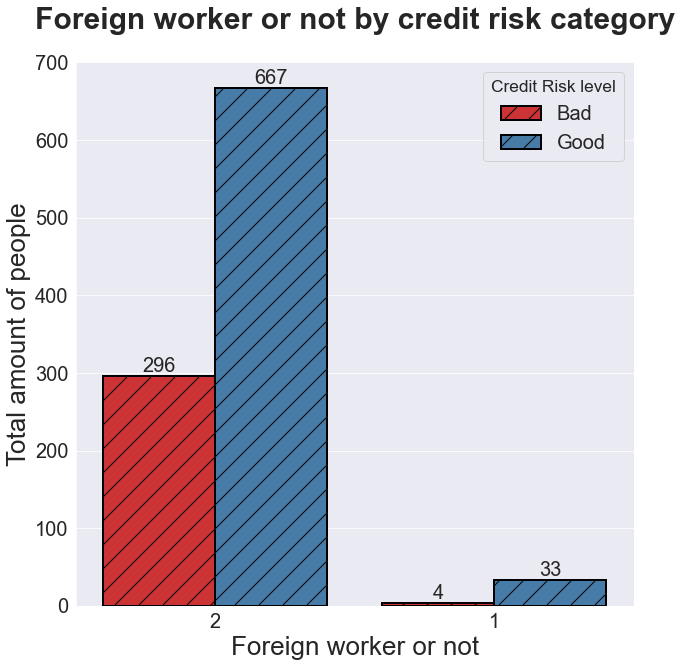

In [27]:
data['foreign_worker'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['foreign_worker'], hue=data['credit_risk'], order=data['foreign_worker'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Foreign worker or not by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Foreign worker or not', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

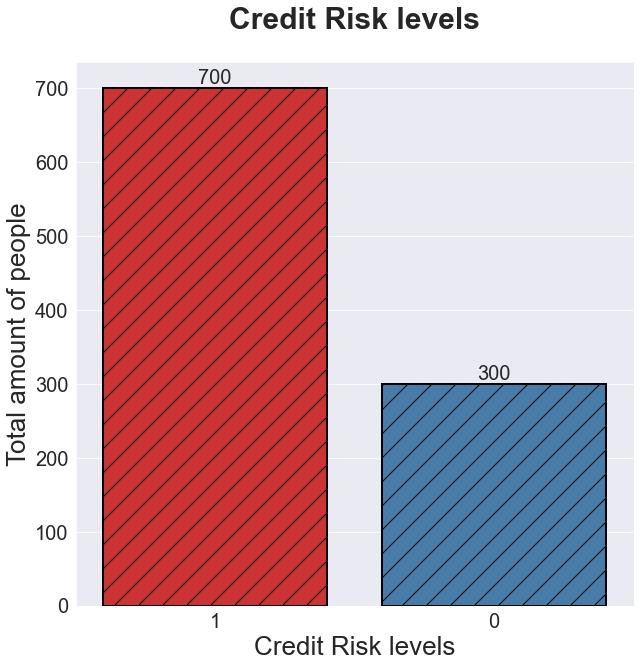

In [28]:
data['credit_risk'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['credit_risk'], order=data['credit_risk'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit Risk levels', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Credit Risk levels', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

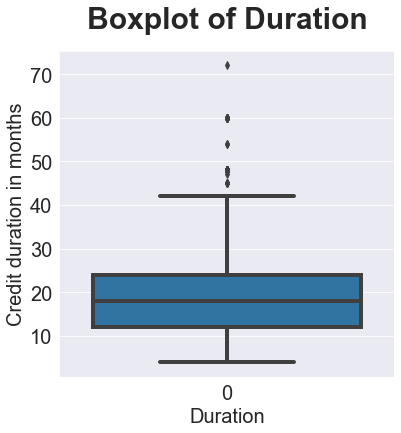

In [29]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['duration'], linewidth=4)
plt.title('Boxplot of Duration', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Credit duration in months', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

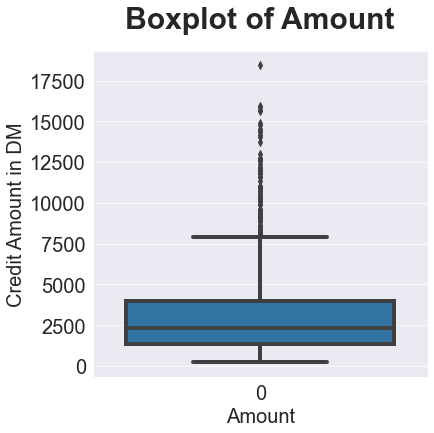

In [30]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['amount'], linewidth=4)
plt.title('Boxplot of Amount', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Credit Amount in DM', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

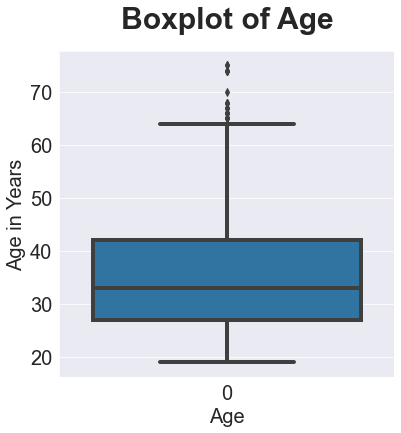

In [31]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['age'], linewidth=4)
plt.title('Boxplot of Age', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Age in Years', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Pre-Processing

In [32]:
X = data.iloc[:,:20]
y = data['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

over_sample = SMOTE(random_state=2)
attributes = X_train.columns
smote_X, smote_y = over_sample.fit_resample(X_train, y_train)

smote_x = pd.DataFrame(data=smote_X, columns=attributes)
smote_y = pd.DataFrame(data=smote_y, columns=['credit_risk'])

print(len(smote_y[smote_y['credit_risk']==0]),len(smote_y[smote_y['credit_risk']==1]))

486 486


## Building the model

In [33]:
features = data.columns.values.tolist()
y = ['credit_risk']
X = [i for i in features if i not in y]

model_log = LogisticRegression(max_iter=10000)
model_rfe = RFE(model_log, step=2)

model_rfe.fit(smote_x, smote_y.values.ravel())
smote_x.drop(smote_x.columns[np.where(model_rfe.support_==False)[0]], axis=1, inplace=True)

In [34]:
X=smote_x
y=smote_y['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
model_log = LogisticRegression(max_iter=10000)
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

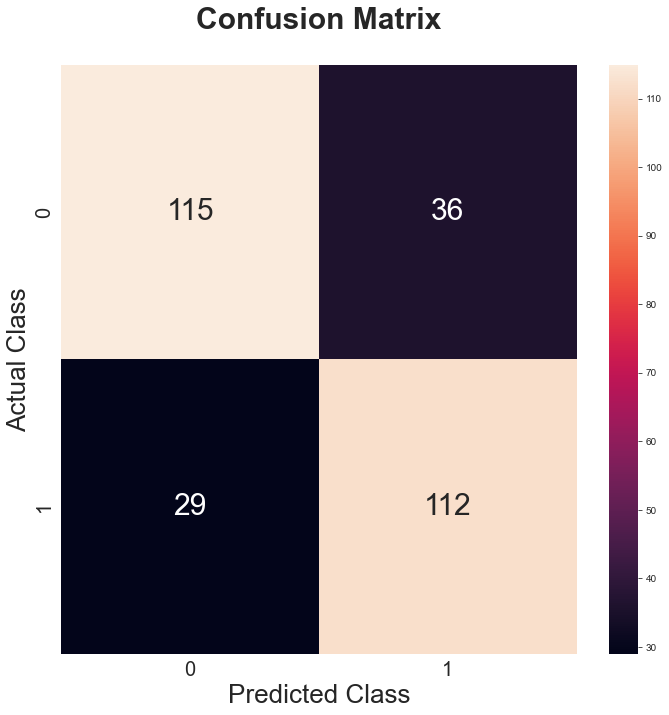

In [35]:
cnfs_mat = confusion_matrix(y_test,y_pred)

plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(cnfs_mat, annot=True, fmt="g", annot_kws={'size': 30})
plt.title('Confusion Matrix', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Predicted Class', fontsize=26)
plt.ylabel('Actual Class', fontsize=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.76      0.79      0.78       141

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292



In [37]:
model_roc_auc = roc_auc_score(y_test, model_log.predict(X_test))
model_roc_auc

0.7779578225541308

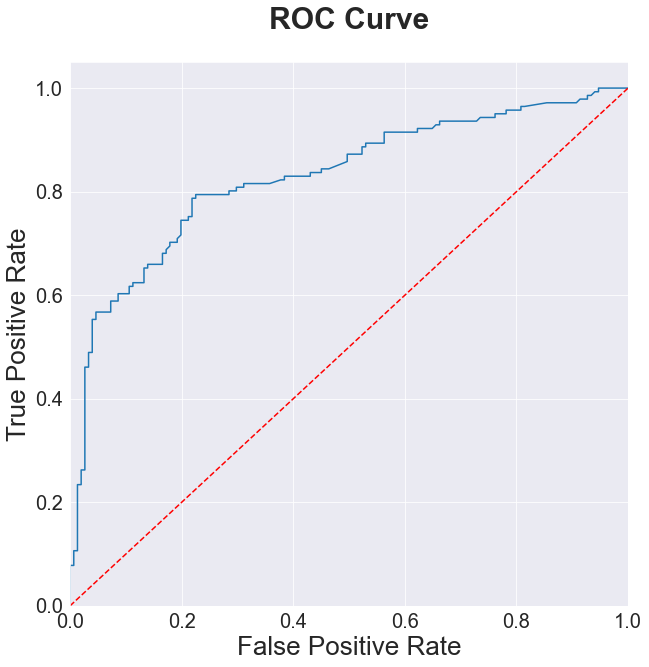

In [38]:
fp_rate, tp_rate, lim = roc_curve(y_test, model_log.predict_proba(X_test)[:,1])

plt.rcParams["figure.figsize"]=(10,10)
plt.plot(fp_rate,tp_rate, label='area = %0.2f'% model_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=26)
plt.ylabel('True Positive Rate', fontsize=26)
plt.title('ROC Curve', fontsize=30, y=1.05, weight='bold')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [39]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(model_log, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1)
print('Accuracy: mean: %.3f std: %.3f' % (np.mean(scores), np.std(scores)))

Accuracy: mean: 0.752 std: 0.040


In [40]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_accuracy = cross_val_score(model_log, X, y, scoring = 'accuracy', cv=cross_val, n_jobs=-1)
scores_precision = cross_val_score(model_log, X, y, scoring = 'precision', cv=cross_val, n_jobs=-1)
scores_recall = cross_val_score(model_log, X, y, scoring = 'recall', cv=cross_val, n_jobs=-1)
scores_f1_score = cross_val_score(model_log, X, y, scoring = 'f1', cv=cross_val, n_jobs=-1)
print(f"Achieved mean accuracy of {np.mean(scores_accuracy):.4f} with std of {np.std(scores_accuracy):.4f}.")
print(f"Achieved mean precision of {np.mean(scores_precision):.4f} with std of {np.std(scores_precision):.4f}.")
print(f"Achieved mean recall of {np.mean(scores_recall):.4f} with std of {np.std(scores_recall):.4f}.")
print(f"Achieved mean f1-score of {np.mean(scores_f1_score):.4f} with std of {np.std(scores_f1_score):.4f}.")

Achieved mean accuracy of 0.7518 with std of 0.0401.
Achieved mean precision of 0.7609 with std of 0.0590.
Achieved mean recall of 0.7362 with std of 0.0594.
Achieved mean f1-score of 0.7463 with std of 0.0450.
